# Single Interaction Dynamics Demonstration

The following is a simple demostration of Single Interaction Dynamics(SID) in Gene Regulatory Networks.

In [69]:
import tellurium as te
import utils
import numpy as np
import matplotlib.pyplot as plt

In [70]:
# notebook constants
START = 0
END = 100
NUM_PTS = 100
INITIAL_VALUES = [.1, 1]

In [71]:
model = '''
$X->Y; beta*X;
Y-> ; alpha*Y;

X = 1; Y = 0;
beta = 1;
alpha = 0.1;

'''

r = te.loada(model)
m = r.simulate(START, END, NUM_PTS)

Assuming constant production (beta) and removal (alpha) rates of Y and constant X, we yield the following graph

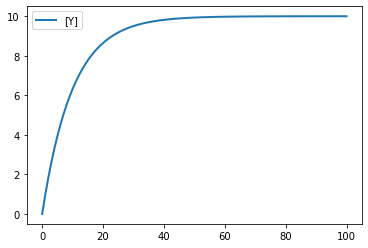

In [72]:
r.plot()

Here we see the eventual approach to steady state, which coincides with the theoretical result of the ODE of the form: Y' = BX - AY

## Response Time

From theory, we know that in single interaction dynamics the response time is only dependant on the rate of removal of the protein of interest. We can demonstrate that phenomenon using a set of DOE simulations

To analyse the response time, we can calculate the speed at which Y reaches its half-maximal point starting from 0 concentration.

### Programming setup

Here we will be using the custom Design of Experiments(doe) tool that can be found in doe_tool.py file

In [73]:
pars_of_interest = ('alpha', 'beta')
def simulation(factors):
    """
    Returns approximate response time of reaching half-maximal value of Y
    event: tuple
        (id of parameter, new parameter value)
    """
    r.resetAll()
    for factor, id in zip(factors, pars_of_interest):
        r[id] = factor
    data = r.simulate(START, END, NUM_PTS)

    # extract last value in dataset, divide by 2 and find location of closest value in said dataset
    halfmax = (data['[Y]'][-1])/2
    return data['time'][np.argmin(abs(data['[Y]'] - halfmax))]
    # return data['[Y]']-halfmax

In [74]:
test = simulation((0.1,1))
test

7.070707070707071

In [75]:
doe = utils.doe_tool(simulation, factor_names=pars_of_interest, initial_values= [1, 1])

The deviations used are percent deviations from the initial values set in the model

In [76]:
deviations = range(-90, 100, 10)

In [77]:
# calculations for alpha, then same for beta in the next cell
doe.reset()
doe.runOneFactorStudy({'alpha': deviations}, initial_values=INITIAL_VALUES)
y_a = doe.getResults()
x_a = [el[0] for el in doe.getTracker()]

In [78]:
doe.reset()
doe.runOneFactorStudy({'beta': deviations}, initial_values=INITIAL_VALUES)
y_b = doe.getResults()
x_b = [el[1] for el in doe.getTracker()]

### Tables and analysis

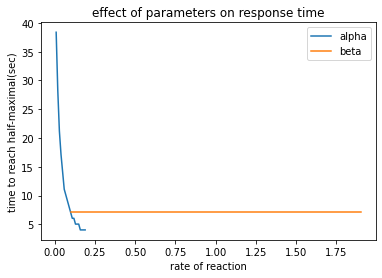

In [84]:
fig, ax = plt.subplots()
ax.plot(x_a, y_a, label='alpha')
ax.plot(x_b, y_b, label='beta')
plt.legend()

_ = ax.set(xlabel='rate of reaction', ylabel='time to reach half-maximal(sec)',
       title='effect of parameters on response time')


From the following rough plot, we can see that, as expected, the response time in SID cases is only dependant on the alpha (rate of removal) in an inverse propotionality fasion.